In [31]:
import numpy as np
import rebound
import reboundx
import matplotlib.pyplot as plt
from tqdm import tqdm
import kgpreamble as kg
kg.set_mplstyle_paper()

In [32]:
def plot_snapshot(sim, a_b):
    fig, ax = plt.subplots(figsize = (18,12), nrows = 3, ncols = 1)

    for i in range(sim.N-2):
        ax[0].scatter(sim.particles[i+2].x, sim.particles[i+2].y, color = 'gray', alpha = 0.4, lw = 0.5)
        ax[1].scatter(sim.particles[i+2].x, sim.particles[i+2].z, color = 'gray', alpha = 0.4, lw = 0.5)
        ax[2].scatter(sim.particles[i+2].y, sim.particles[i+2].z, color = 'gray', alpha = 0.4, lw = 0.5)

    for j in [0, 1]:
        ax[0].scatter(sim.particles[j].x, sim.particles[j].y, color = 'orange', lw =5)
        ax[1].scatter(sim.particles[j].x, sim.particles[j].z, color = 'orange', lw =5)
        ax[2].scatter(sim.particles[j].y, sim.particles[j].z, color = 'orange', lw =5)

    for a in ax:
        a.set(xlim = (-0.75*a_b, 0.75*a_b))
        a.axis('equal')

    ax[0].set(xlabel = r'$x$[AU]', ylabel = r'$y$[AU]')
    ax[1].set(xlabel = r'$x$[AU]', ylabel = r'$z$[AU]')
    ax[2].set(xlabel = r'$y$[AU]', ylabel = r'$z$[AU]')

In [63]:
sim = rebound.Simulation()
sim.add(m = 1)


# set up binary
a_b = 500
sim.add(m = 1, a = a_b, inc = np.radians(20))


# set up debris disk
N_particles = 500
r_min = 20; r_max = 100; disk_width = np.abs(r_min-r_max)
semi_major_axes_lin = np.linspace(r_min, r_max, N_particles)
p_sd = -1
Surface_density = np.array([(r**p_sd) for r in semi_major_axes_lin])
Surface_density_norm = Surface_density/np.sum(Surface_density)
Delta_rs = np.array([1/Surface_density_norm[i] for i in range(N_particles)])
Delta_rs_norm = disk_width * Delta_rs/np.sum(Delta_rs)
semi_major_axes = np.array([r_min + np.sum(Delta_rs_norm[:i]) for i in range(N_particles)])

#plt.scatter(semi_major_axes, np.linspace(0,1,500), lw =0.1, alpha =0.5)

anamolies = np.array([2*np.pi*np.random.rand() for N in range(N_particles)])

i = 0
for N in range(N_particles):
    sim.add(m = 0, a = semi_major_axes[i], omega = anamolies[i], primary = sim.particles[0])
    i += 1



sim.move_to_com()

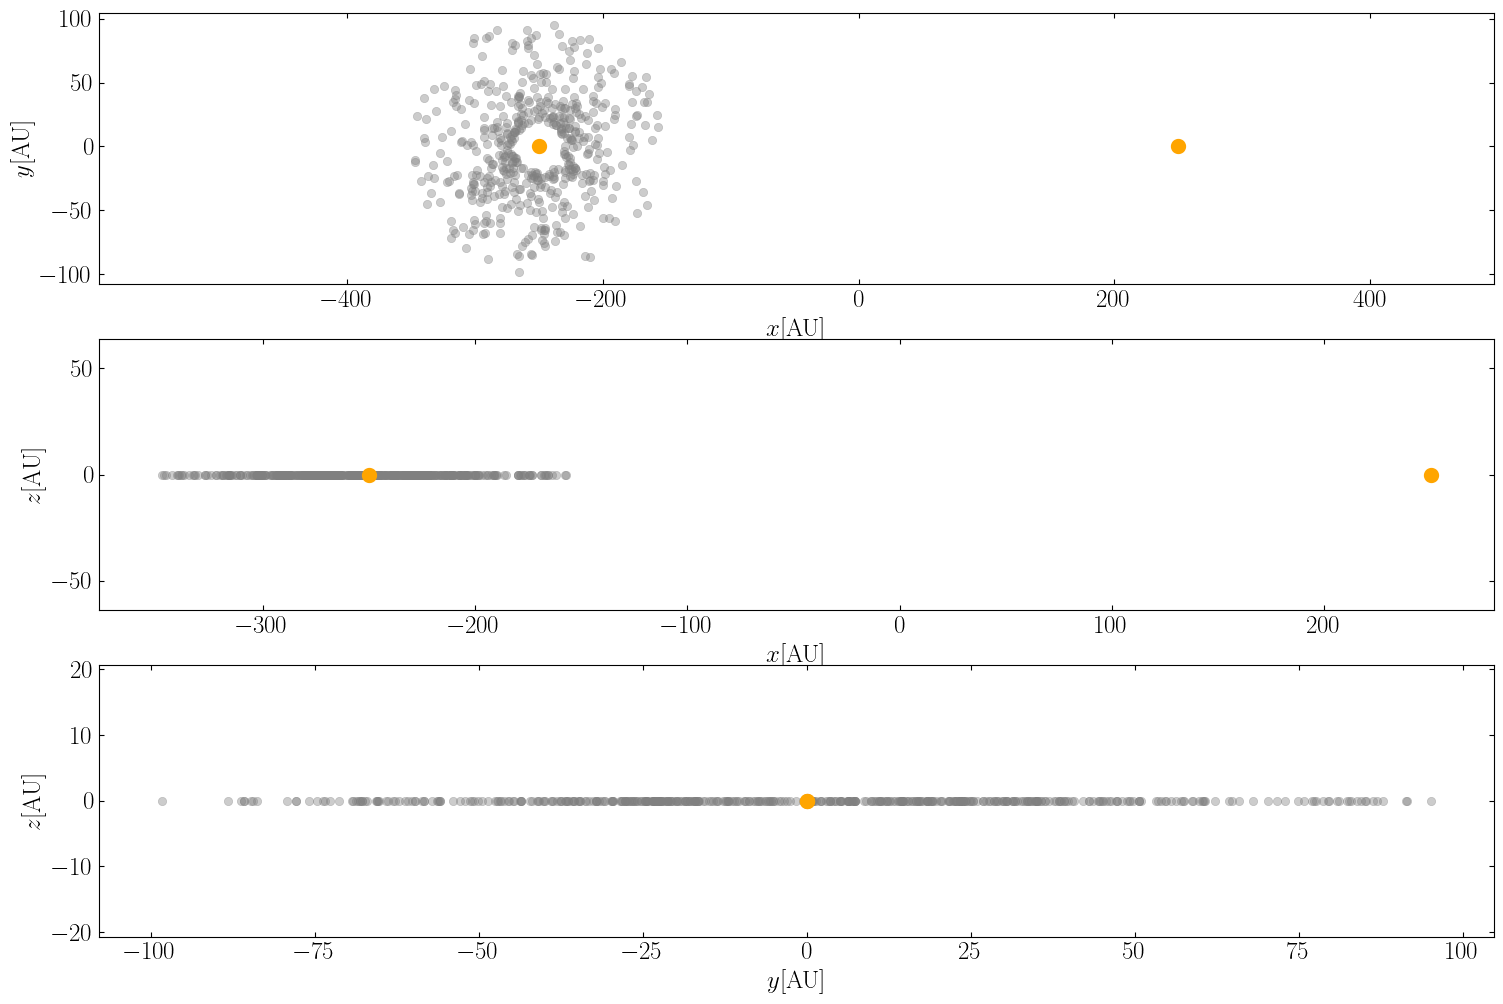

In [64]:
plot_snapshot(sim, a_b)

In [65]:
# Define integration time
tmax =  2e4 * 2* np.pi
tstep = 10 * 2 * np.pi
times = np.arange(0, tmax, tstep)
Nout = len(times) # number of time steps

p_binary = np.zeros((Nout, 4)) # 4 = number of quantities I care about, in this case a (semi maj axis), e = eccentricity, 
p_primary = np.zeros((Nout, 4))

p = np.zeros((Nout, sim.N-1, 4))
for i, t in tqdm(enumerate(times)):
    sim.integrate(t)
    for n in range(sim.N-2):
        a = sim.particles[n+1].calculate_orbit(primary=sim.particles[0]).a
        e = sim.particles[n+1].calculate_orbit(primary=sim.particles[0]).e
        pomega = sim.particles[n+1].calculate_orbit(primary=sim.particles[0]).pomega
        inc = sim.particles[n+1].calculate_orbit(primary=sim.particles[0]).inc
        p[i][n+1] = a, e, pomega, inc
    

2000it [02:47, 11.97it/s]


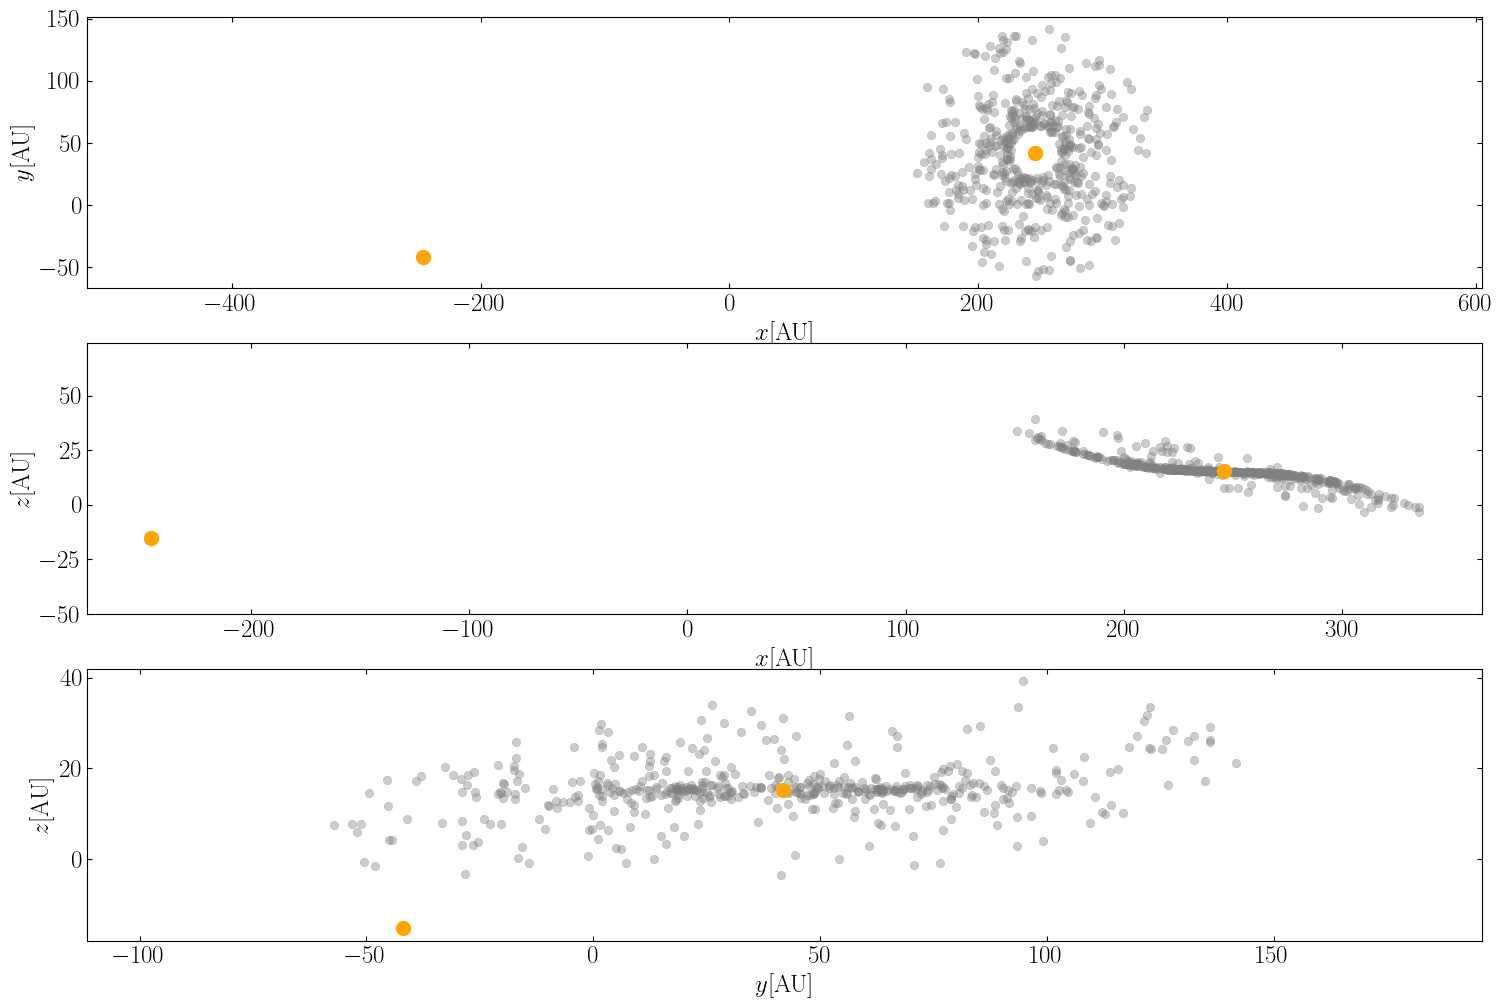

In [66]:
plot_snapshot(sim, a_b)

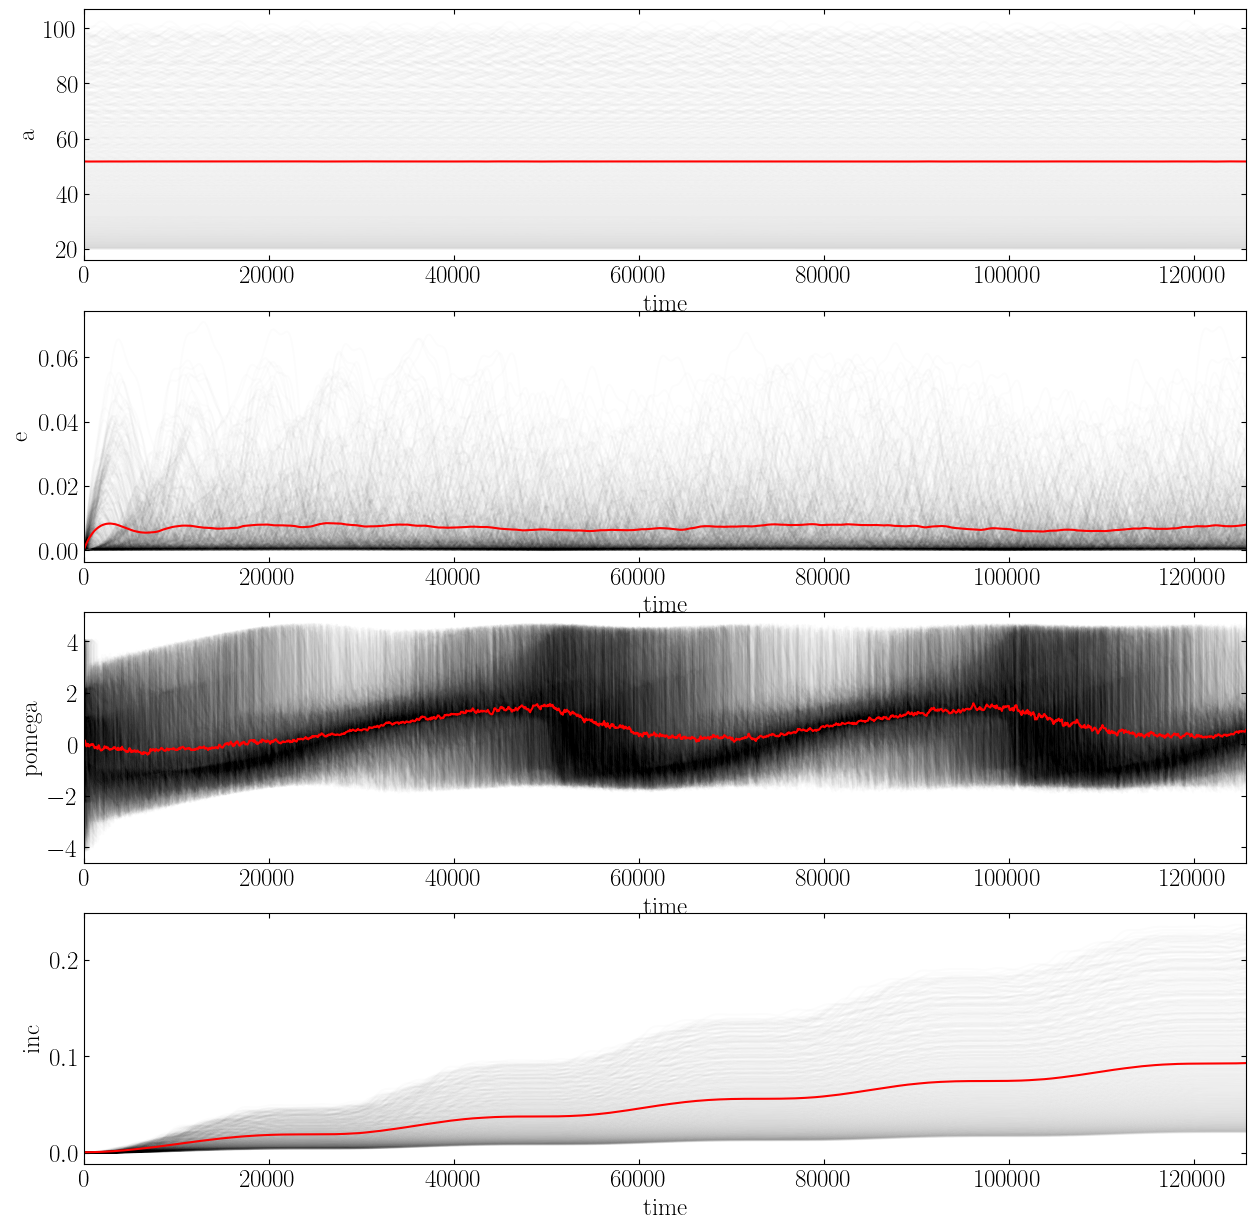

In [73]:
fig, ax = plt.subplots(figsize = (15, 15), nrows = 4)
for n in range(sim.N-3):
    m = n+2
    ax[0].plot(times, p[:,m,0], alpha = 0.01, color = 'black')
    ax[1].plot(times, p[:,m,1], alpha = 0.01, color = 'black')
    ax[2].plot(times, p[:,m,2], alpha = 0.01, color = 'black')
    ax[3].plot(times, p[:,m,3], alpha = 0.01, color = 'black')

ax[0].plot(times, np.average(p[:,:,0], axis = 1), color = 'red')
ax[1].plot(times, np.average(p[:,:,1], axis = 1), color = 'red')
ax[2].plot(times, np.average(p[:,:,2], axis = 1), color = 'red')
ax[3].plot(times, np.average(p[:,:,3], axis = 1), color = 'red')


ax[0].set(ylabel = 'a')
ax[1].set(ylabel = 'e')
ax[2].set(ylabel = 'pomega')
ax[3].set(ylabel = 'inc')

for a in ax:
    a.set(xlim = (times[0], times[-1]), xlabel = 'time')

In [62]:
sim.particles[2].calculate_orbit(primary=sim.particles[0]).e

0.0004781845759458925

SyntaxError: invalid syntax (762416420.py, line 1)